In [1]:
%cd D:\SLIIT\3rd year 2nd sem\Machine Learning amd Optimization Methods\Lectures

D:\SLIIT\3rd year 2nd sem\Machine Learning amd Optimization Methods\Lectures


In [4]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#Support vector classification
data = pd.read_csv("D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Lectures\\Bank.csv")
data.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [12]:
x = data.iloc[:,:7]
y = data.iloc[:,7]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
#Creating the model
svcl = SVC(kernel="linear",C=1,probability=True)

In [16]:
#Training the model
svcl.fit(x_train,y_train)

SVC(C=1, kernel='linear', probability=True)

In [17]:
#Predictions and accuracy
y_pred = svcl.predict(x_test)
accuracy_score(y_test,y_pred)

0.9026462733673222

In [18]:
#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[7184,  141],
       [ 661,  252]], dtype=int64)

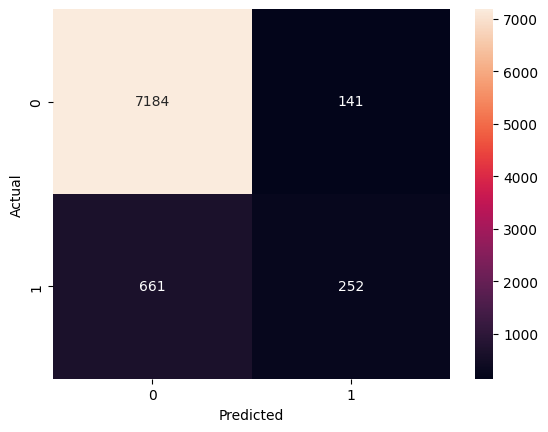

In [19]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
#Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7325
           1       0.64      0.28      0.39       913

    accuracy                           0.90      8238
   macro avg       0.78      0.63      0.67      8238
weighted avg       0.89      0.90      0.88      8238



In [21]:
#ROC and AUC
y_pred_probs = svcl.predict_proba(x_test)

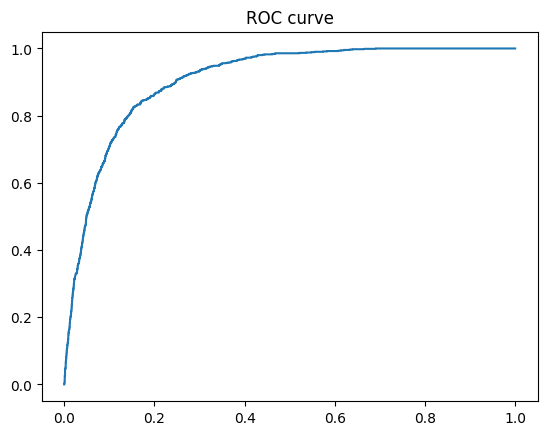

In [22]:
fpr,tpr,_ = roc_curve(y_test, y_pred_probs[:,1])
plt.plot(fpr,tpr)
plt.title("ROC curve")
plt.show()

In [23]:
auc = roc_auc_score(y_test,y_pred_probs[:,1])
auc

0.9079965907689088

In [24]:
#Selecting parameters with Hyper Parameter Optimization
params = {"C":[0.5,1],"kernel":["linear","poly"]}
model = SVC()
cval = KFold(n_splits=2)  

In [25]:
gsearch = GridSearchCV(model,params,cv=cval)

In [26]:
results = gsearch.fit(x_train,y_train)

In [28]:
results.best_params_

{'C': 1, 'kernel': 'linear'}